In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\OneDrive\文件\Mall_Customers.csv",header=None)

In [3]:
print(df.sample(7))

       0       1   2    3   4
71    72  Female  47   49  42
25    26    Male  29   28  82
97    98  Female  27   60  50
135  136  Female  29   73  88
194  195  Female  47  120  16
91    92    Male  18   59  41
53    54    Male  59   43  60


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

0     int64
1    object
2     int64
3     int64
4     int64
dtype: object

In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [7]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X=df.drop(['Spending Score (1-100)'],axis=1)

In [10]:
X.shape

(200, 4)

In [11]:
X.describe()

,CustomerID,Age,Annual Income (k$)
count,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000
std,57.879185,13.969007,26.264721
min,1.000000,18.000000,15.000000
25%,50.750000,28.750000,41.500000
50%,100.500000,36.000000,61.500000
75%,150.250000,49.000000,78.000000
max,200.000000,70.000000,137.000000


In [12]:
print(df["Gender"].unique())

['Male' 'Female']


In [13]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [15]:

print(kmeans.labels_)

[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1]


In [16]:
print(kmeans.cluster_centers_)

[[44.48387097 59.87903226 35.42741935]
 [32.97560976 88.73170732 79.24390244]
 [25.77142857 29.97142857 68.51428571]]


In [17]:
print(kmeans.n_iter_)

7


In [18]:
print(kmeans.n_features_in_)

3


In [19]:
print(kmeans.feature_names_in_)

['Age' 'Annual Income (k$)' 'Spending Score (1-100)']


In [20]:
print(kmeans.inertia_)

158744.97108013937


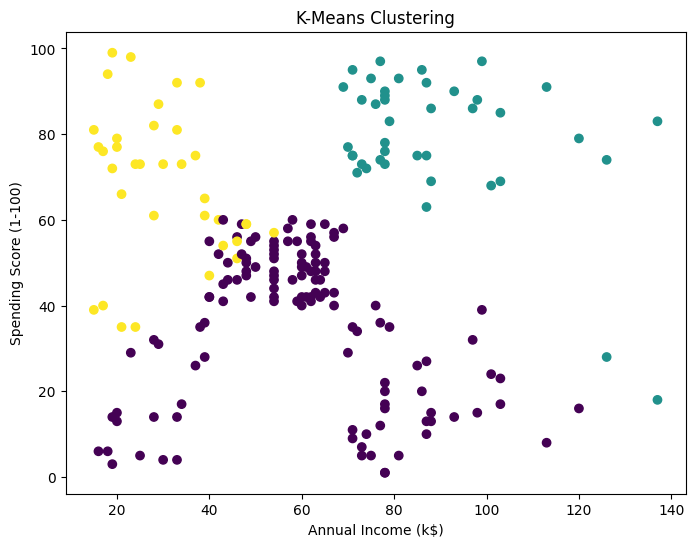

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_)  
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.show()


In [22]:
inertia_score = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    inertia_score.append(model.inertia_)

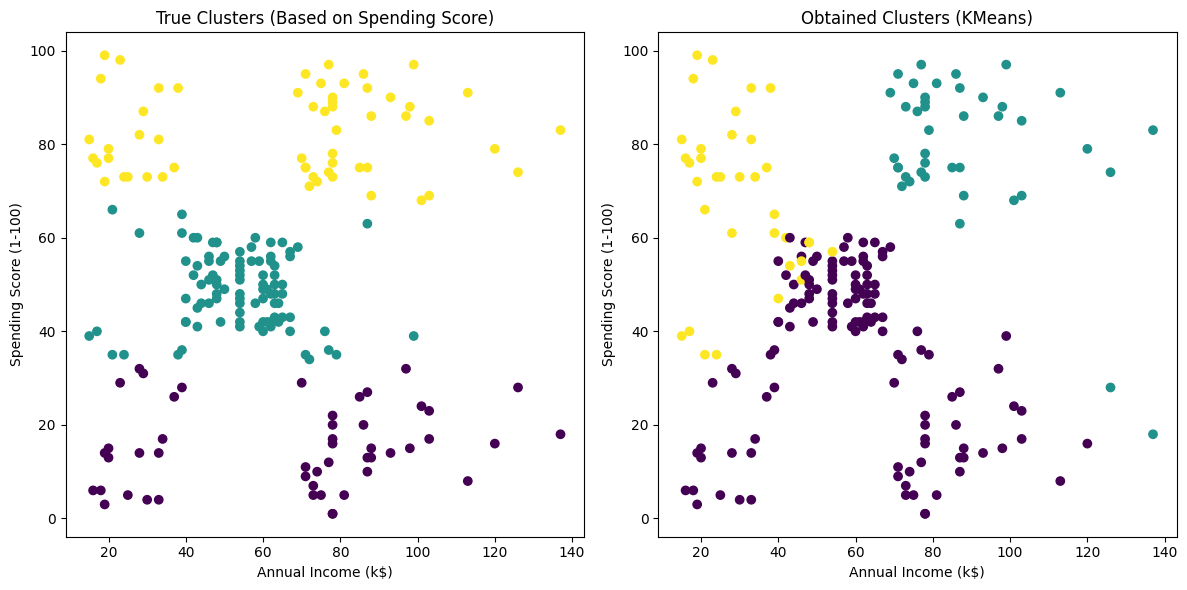

In [23]:
true_labels = pd.cut(X['Spending Score (1-100)'], bins=3, labels=[0, 1, 2])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=true_labels, cmap='viridis')
plt.title("True Clusters (Based on Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.subplot(1, 2, 2)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
plt.title("Obtained Clusters (KMeans)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.tight_layout()
plt.show()


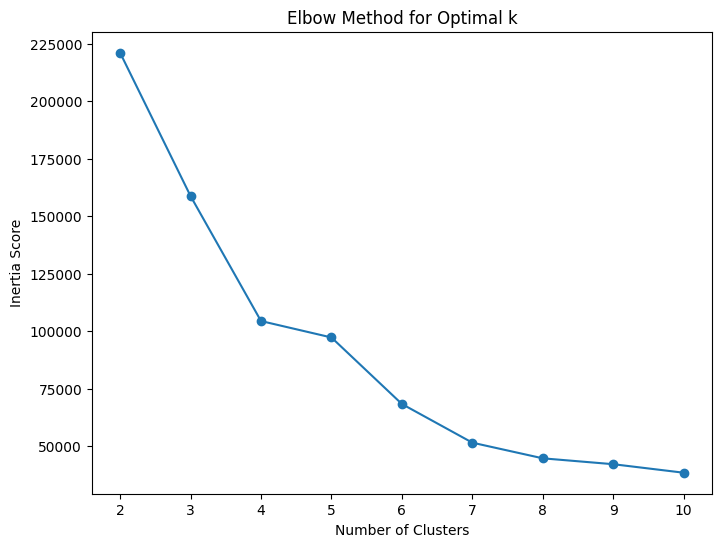

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_score, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")
plt.title("Elbow Method for Optimal k")
plt.show()

*Agglomerative Clustering*


In [25]:
from sklearn.cluster import AgglomerativeClustering


In [26]:
agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(X)


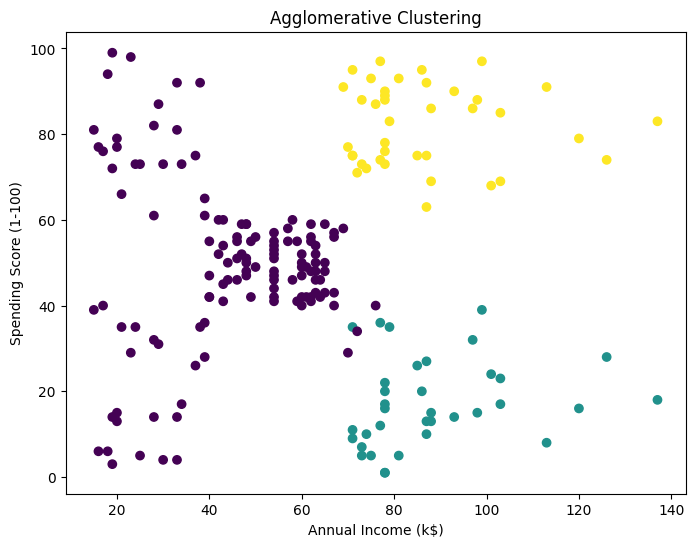

In [27]:

plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Clustering")
plt.show()